In [1]:
%pylab inline
from __future__ import print_function
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


In [2]:
!afplay media/passport.wav

dlopen error : dlopen(libjack.0.dylib, 1): image not found 
JAR: Blacklisted client Xquartz
JAR: Blacklisted client Terminal
JAR: Blacklisted client loginwindow
JAR: Blacklisted client Xcode
JAR: Blacklisted client SystemUIServer
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JAR: jack server not running or rejected client


## Python wave module

In [3]:
import wave

In [4]:
fp = wave.open("media/passport.wav", 'r')
print(fp)

In [5]:
print(fp.getnchannels(), fp.getsampwidth(), fp.getframerate(), fp.getnframes(), fp.getcomptype(), fp.getcompname())

1 2 44100 331098 NONE not compressed


In [6]:
fp.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=331098, comptype='NONE', compname='not compressed')

In [7]:
bytes = fp.readframes(8)
print(bytes)

b'Y\x00\xe1\x00\xb6\x00\x89\x00\xbc\x00\x81\x00\xfc\xff\xb3\xff'


In [8]:
for byte in bytes:
    print(byte) 

89
0
225
0
182
0
137
0
188
0
129
0
252
255
179
255


You need to use the struct python module to pack/unpack  bytes... # XXX what does this mean?

## Scipy io module

In [9]:
from scipy.io import wavfile

In [10]:
sr, samples = wavfile.read('media/passport.wav')

In [11]:
sr

44100

In [12]:
len(samples)

331098

In [13]:
type(samples)

numpy.ndarray

In [14]:
samples.dtype

dtype('int16')

In [15]:
max(samples), min(samples)

(22542, -21853)

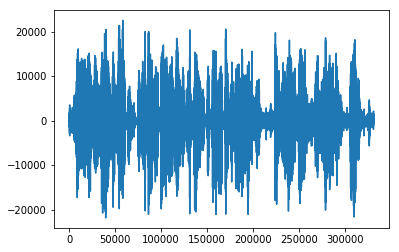

In [16]:
plot(samples)

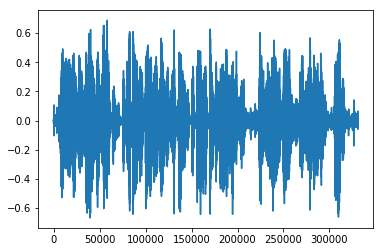

In [17]:
plot(samples / (2**15 -1)) # python3 division

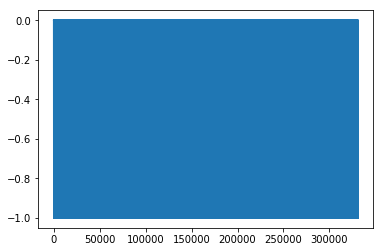

In [18]:
plot(samples // (2**15 -1)) # python2 (integer) division

## Image reading

In [19]:
img = imread('media/python.jpg')

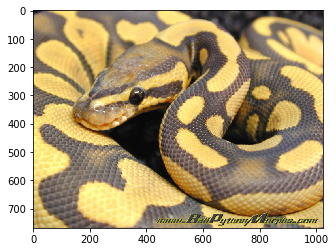

In [20]:
imshow(img)

In [21]:
img.dtype

dtype('uint8')

In [22]:
img.shape

(768, 1024, 3)

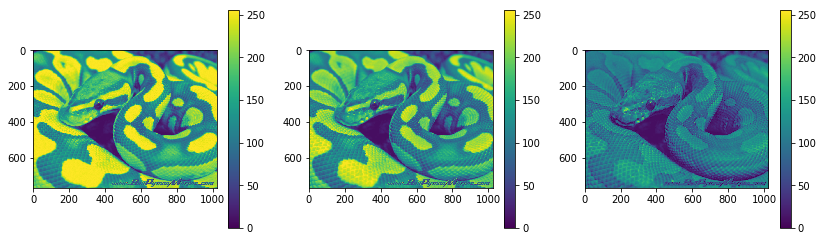

In [23]:
subplot(131)
imshow(img[:,:,0])
colorbar()
subplot(132)
imshow(img[:,:,1])
colorbar()
subplot(133)
imshow(img[:,:,2])
colorbar()

gcf().set_figwidth(14)

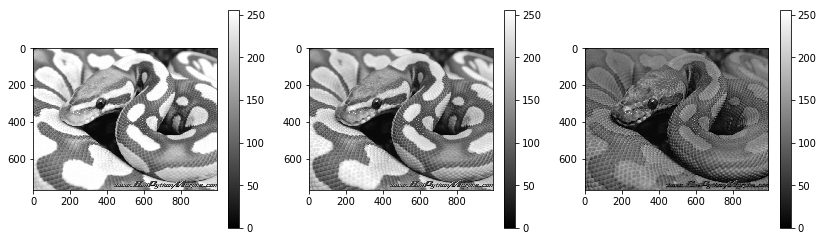

In [24]:
subplot(131)
imshow(img[:,:-30,0], cmap=cm.gray)
colorbar()
subplot(132)
imshow(img[:,:-30,1], cmap=cm.gray)
colorbar()
subplot(133)
imshow(img[:,:-30,2], cmap=cm.gray)
colorbar()

gcf().set_figwidth(14)

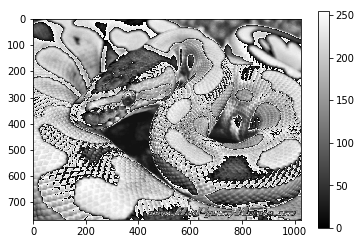

In [25]:
imshow(img[:,:,0] + img[:,:,1], cmap=cm.gray)
colorbar()

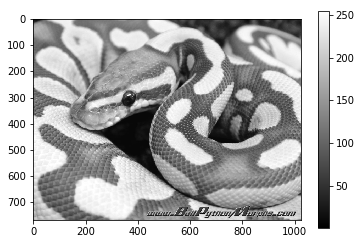

In [26]:
imshow(img[:,:,0]/2 + img[:,:,1]/2, cmap=cm.gray)
colorbar()

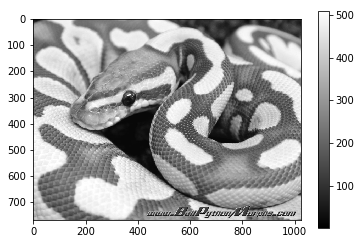

In [27]:
imshow(img[:,:,0].astype(int16) + img[:,:,1].astype(int16), cmap=cm.gray)
colorbar()

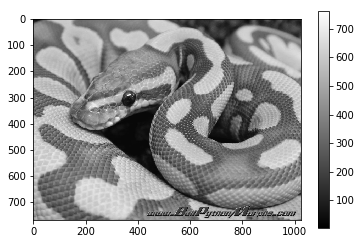

In [28]:
imshow(sum(img, axis=2), cmap=cm.gray)
colorbar()

In [29]:
sum(img, axis=2).dtype

dtype('uint64')

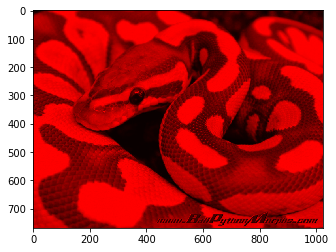

In [30]:
red_only = img.copy()
red_only[:,:,1] = 0
red_only[:,:,2] = 0
imshow(red_only)

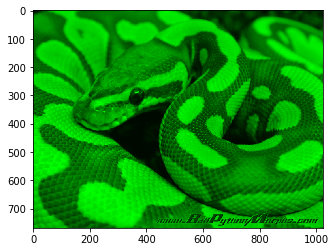

In [31]:
green_only = img.copy()
green_only[:,:,0] = 0
green_only[:,:,2] = 0
imshow(green_only)

dtype('uint8')

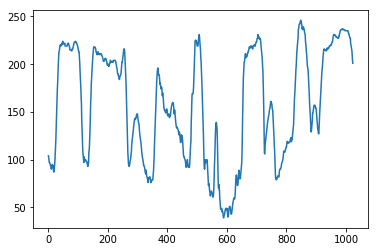

In [32]:
sig = img[120,:, 1]
plot(sig)
sig.dtype

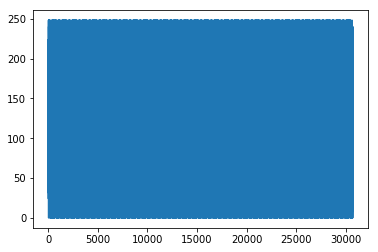

In [33]:
sigout = list((sig - 100) * 200)*30
plot(sigout)

What?!?!

In [34]:
sig.dtype

dtype('uint8')

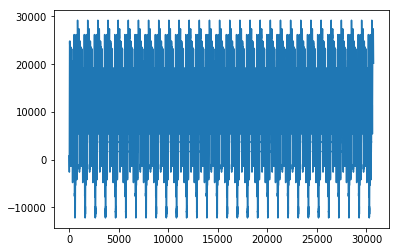

In [35]:
sigout = list((sig.astype(int16) - 100) * 200)*30
plot(sigout)


In [36]:
wavfile.write('result/outsig.wav', 44100, array(sigout, dtype=int16))

In [37]:
!afplay result/outsig.wav
pass

dlopen error : dlopen(libjack.0.dylib, 1): image not found 
JAR: Blacklisted client Xquartz
JAR: Blacklisted client Terminal
JAR: Blacklisted client loginwindow
JAR: Blacklisted client Xcode
JAR: Blacklisted client SystemUIServer
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JAR: jack server not running or rejected client


In [38]:
a = array([[1,2,3],[4,5,6]])
b = array(a.flat)
b

array([1, 2, 3, 4, 5, 6])

In [39]:
audioout = array(((img[:,:,0].astype(int16)- 100) * 200).flat)
wavfile.write('result/outsig2.wav', 44100, audioout)

In [40]:
!afplay result/outsig2.wav

dlopen error : dlopen(libjack.0.dylib, 1): image not found 
JAR: Blacklisted client Xquartz
JAR: Blacklisted client Terminal
JAR: Blacklisted client loginwindow
JAR: Blacklisted client Xcode
JAR: Blacklisted client SystemUIServer
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JAR: jack server not running or rejected client


See [_Raster Scanning: A New Approach to Image Sonification,
Sound Visualization, Sound Analysis And Synthesis_ by Yeo and Berger 2006)](https://ccrma.stanford.edu/~woony/publications/Yeo_Berger-ICMC06.pdf)

In [ ]:
audioout = array(((img[:,:,0].astype(int16)- 100) * 200).flat)
wavfile.write('result/outsig3.wav', 8000, audioout)

In [ ]:
!afplay result/outsig3.wav

dlopen error : dlopen(libjack.0.dylib, 1): image not found 
JAR: Blacklisted client Xquartz
JAR: Blacklisted client Terminal
JAR: Blacklisted client loginwindow
JAR: Blacklisted client Xcode
JAR: Blacklisted client SystemUIServer
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JAR: jack server not running or rejected client


In [ ]:
sr,sample = wavfile.read('media/passport.wav')

In [ ]:
sample.size

In [ ]:
256 * 256 * 3

In [ ]:
newimg = sample[:196608].reshape(256,256,3)

In [ ]:
newimg.max(), (newimg/100.0).max()

In [ ]:
newimg.shape

In [ ]:
plot(sample)

In [ ]:
imshow(newimg/100.0)

In [ ]:
imshow(100 + newimg/200.0)

In [ ]:
256*512

In [ ]:
newimg = sample[:256*512].reshape(256,512)
imshow(newimg, cmap=cm.gray)
colorbar()

In [ ]:
imshow(abs(newimg), cmap=cm.gray)
colorbar()

In [ ]:
imsave('result/outimg.jpg', newimg, cmap=cm.cool)

More colormaps:

http://matplotlib.org/examples/color/colormaps_reference.html

In [ ]:
newimgR = sample[:256*512].reshape(256,512, 1)
newimgG = sample[100:256*512 + 100].reshape(256,512, 1)
newimgB = sample[200:256*512 + 200].reshape(256,512, 1)
newimg = concatenate( [newimgR/2.0**8, newimgG/2.0**8, newimgB/2.0**8], axis = 2)
print(newimg.shape, newimg.dtype)

In [ ]:
newimg.max(), newimg.min()

In [ ]:
imshow((newimg + 127.0).astype(uint8))

In [ ]:
imshow(newimg[:,:,0])

In [ ]:
imshow(newimg[:,:,1])

In [ ]:
imshow((newimg + 127).astype(float)/100)
colorbar()

In [ ]:
imshow(newimg/100)

In [ ]:
newimgR = sample[:256*512].reshape(256,512, 1)
newimgG = sample[14000:256*512 + 14000].reshape(256,512, 1)
newimgB = sample[10000:256*512 + 10000].reshape(256,512, 1)
newimg = concatenate( [newimgR/2.0**8, newimgG/2.0**8, newimgB/2.0**8], axis = 2)
print(newimg.shape)

In [ ]:
imshow((newimg + 127).astype(uint8))
ylim((0,100))
xlim((100, 200))

In [ ]:
newimgR = sample[:256*512].reshape(256,512, 1)
newimgG = sample[14000:256*512 + 14000].reshape(256,512, 1)
newimgB = sample[10000:256*512 + 10000].reshape(256,512, 1)
newimg = concatenate( [newimgR/2.0**13, newimgG/2.0**12, newimgB/2.0**8], axis = 2)
imshow((newimg + 127).astype(uint8))
ylim((0,100))
xlim((100, 200))